In [1]:
import torch.optim as optim
from src.env.pig_game import PigGame
from src.env.dummy_player import DummyPlayer  # Import the Dummy player
from src.model.actor_critic import Actor, Critic  # Import Actor and Critic models
from src.loop.training_loop import training_loop

In [2]:
env = PigGame()

# Initialize the actor and critic networks
input_dim = 7
actor = Actor(input_dim)  # Assuming input_dim is 7
critic = Critic(input_dim)  # Assuming input_dim is 7

# Initialize the dummy player
dummy = DummyPlayer()

In [9]:
# Optimizers for actor and critic
actor_optimizer = optim.Adam(actor.parameters(), lr=1e-3)
critic_optimizer = optim.Adam(critic.parameters(), lr=1e-3)

# Set hyperparameters
num_episodes = 1e2
gamma = 0.99

In [10]:
# Run the training loop with debug prints
rewards = training_loop(
    env=env, 
    actor=actor, 
    critic=critic, 
    dummy=dummy, 
    actor_optimizer=actor_optimizer, 
    critic_optimizer=critic_optimizer, 
    gamma=gamma, 
    num_episodes=int(num_episodes), 
    debug=False
)

/home/lewelotki/PigGame/src/loop/training_loop.py:168: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float32)


Episode 0 finished, Total Reward (NN only): 20.0


In [5]:
import numpy as np

# Function to calculate moving average
def moving_average(values, window):
    """
    Computes the moving average of the values with the given window size.
    
    Parameters:
    - values: List or array of rewards
    - window: Window size for the moving average
    
    Returns:
    - moving_avg: Array of moving average values
    """
    return np.convolve(values, np.ones(window) / window, mode='valid')

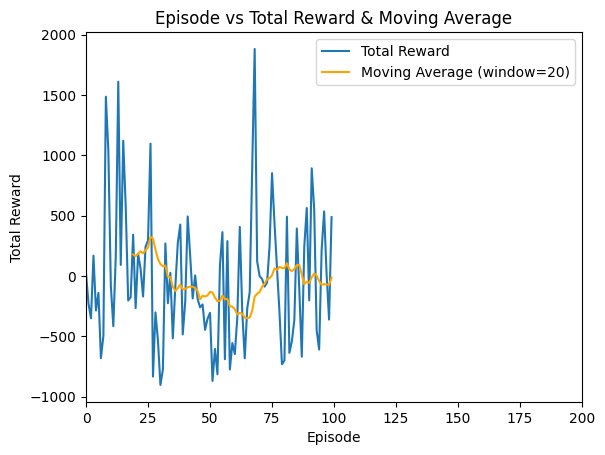

In [11]:
import matplotlib.pyplot as plt

# Calculate the moving average (e.g., over a window of 50 episodes)
window_size = 20
moving_avg_rewards = moving_average(rewards, window_size)

# Plot total rewards
plt.plot(range(len(rewards)), rewards, label='Total Reward')

# Plot moving average of rewards (adjust for the shorter length due to the moving average)
plt.plot(range(window_size - 1, len(rewards)), moving_avg_rewards, label=f'Moving Average (window={window_size})', color='orange')

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Total Reward')
# plt.ylim([-1000,5000])
# plt.xlim([0,200])
plt.title('Episode vs Total Reward & Moving Average')
plt.legend()

# Show the plot
plt.show()
